## Chapter 3 Basic Image Filtering Operations
### Image Denoising
1. Box filter
2. Gaussian filter
3. Median filter
4. Bilateral filter

### Image Enhancement
1. Sharp-unsharp masking

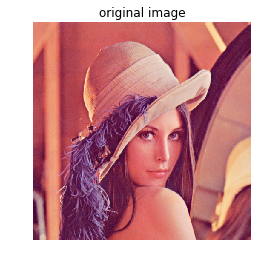

In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

image = cv2.imread('./test_data/lenna.png')
plt.imshow(image[:,:,[2,1,0]])
plt.title('original image')
plt.axis('off')
plt.show()

### Box filtering

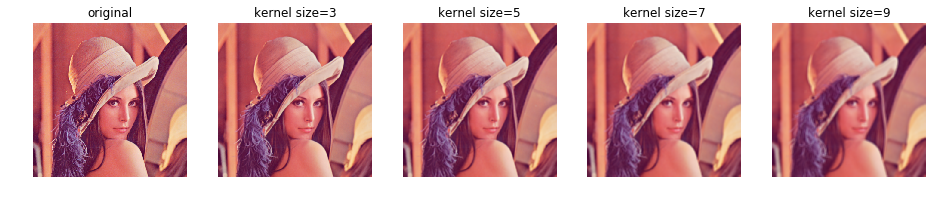

In [2]:
plt.figure(figsize=(16,4))
plt.subplot(1,5,1)
plt.title('original')
plt.axis('off')
plt.imshow(image[:,:,[2,1,0]])
for i, k in enumerate([3,5,7,9]):
    result = cv2.blur(image,(k,k))
    plt.subplot(1,5,i+2)
    plt.title('kernel size='+str(k))
    plt.axis('off')
    plt.imshow(result[:,:,[2,1,0]])
plt.show()

### Gaussian filtering

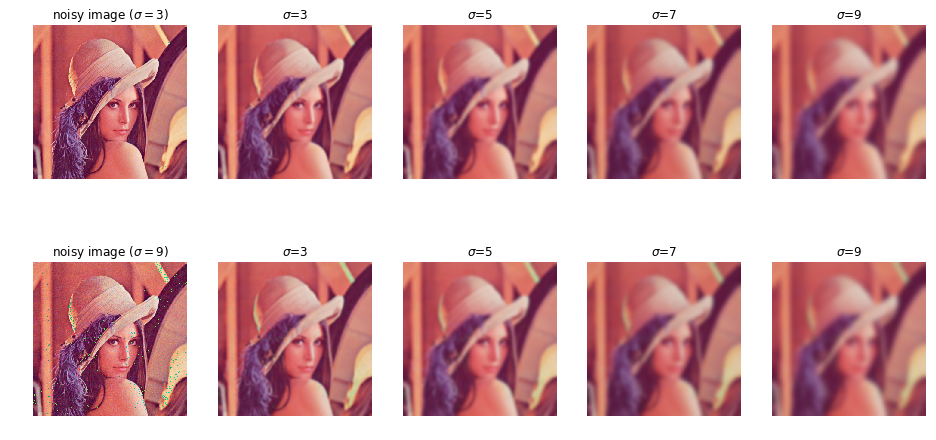

In [3]:
import numpy as np
noisy_image_3 = (image.astype(np.float) + np.random.randn(*image.shape)*3).astype(dtype=np.uint8)
noisy_image_9 = (image.astype(np.float) + np.random.randn(*image.shape)*9).astype(dtype=np.uint8)

plt.figure(figsize=(16,8))

plt.subplot(2,5,1)
plt.title('noisy image ($\sigma=3$)')
plt.axis('off')
plt.imshow(noisy_image_3[:,:,[2,1,0]])

plt.subplot(2,5,6)
plt.title('noisy image ($\sigma=9$)')
plt.axis('off')
plt.imshow(noisy_image_9[:,:,[2,1,0]])

for i, sigma in enumerate([3,5,7,9]):
    result = cv2.GaussianBlur(noisy_image_3,(0,0),sigma) # (0,0) means that the kernel size is determined by sigma_x and sigma_y.
    plt.subplot(2,5,i+2)
    plt.title('$\sigma$='+str(sigma))
    plt.axis('off')
    plt.imshow(result[:,:,[2,1,0]])

    result = cv2.GaussianBlur(noisy_image_9,(0,0),sigma) # (0,0) means that the kernel size is determined by sigma_x and sigma_y.
    plt.subplot(2,5,i+7)
    plt.title('$\sigma$='+str(sigma))
    plt.axis('off')
    plt.imshow(result[:,:,[2,1,0]])
plt.show()

### Median filtering

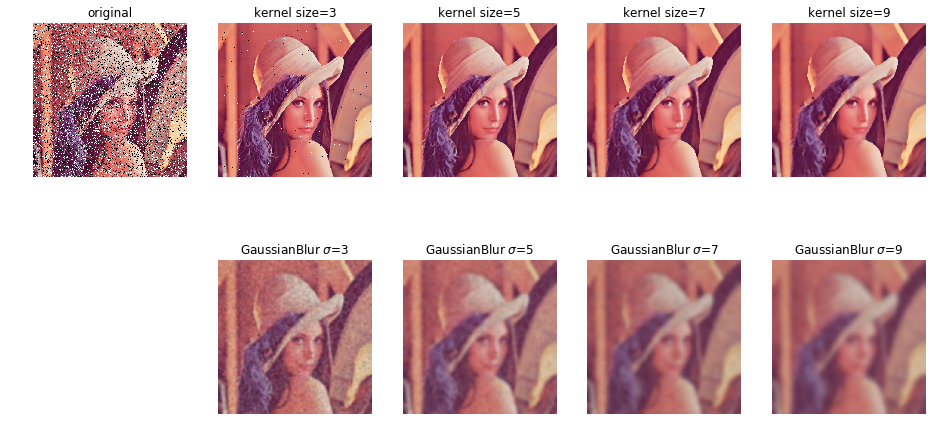

In [4]:
import numpy as np
noise = np.random.randint(0,80,image.shape[0:2])
noise1= np.nonzero(noise >= 70)
noise0= np.nonzero(noise <  10)
image_salt_and_pepper = image.copy()
image_salt_and_pepper[noise1[0],noise1[1],:] = (255,255,255)
image_salt_and_pepper[noise0[0],noise0[1],:] = (0,0,0)
plt.figure(figsize=(16,8))
plt.subplot(2,5,1)
plt.title('original')
plt.axis('off')
plt.imshow(image_salt_and_pepper[:,:,[2,1,0]])
for i, k in enumerate([3,5,7,9]):
    result = cv2.medianBlur(image_salt_and_pepper,k) # (0,0) means that the kernel size is determined by sigma_x and sigma_y.
    plt.subplot(2,5,i+2)
    plt.title('kernel size='+str(k))
    plt.axis('off')
    plt.imshow(result[:,:,[2,1,0]])
    result = cv2.GaussianBlur(image_salt_and_pepper,(0,0),k) # (0,0) means that the kernel size is determined by sigma_x and sigma_y.
    plt.subplot(2,5,7+i)
    plt.title('GaussianBlur $\sigma$='+str(k))
    plt.axis('off')
    plt.imshow(result[:,:,[2,1,0]])
plt.show()

### Bilateral filtering

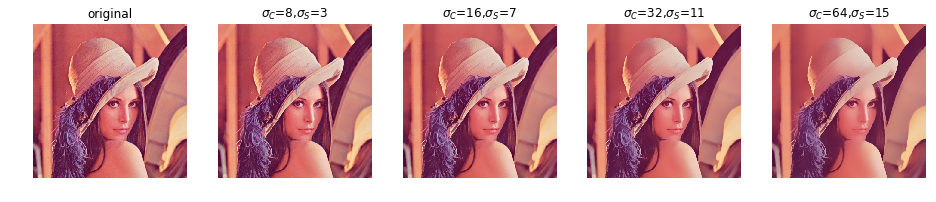

In [5]:
plt.figure(figsize=(16,4))
plt.subplot(1,5,1)
plt.title('original')
plt.axis('off')
plt.imshow(image[:,:,[2,1,0]])
for i, (sigmaColor,sigmaSpace) in enumerate(zip([8,16,32,64],[3,7,11,15])):
    result = cv2.bilateralFilter(image,-1,sigmaColor,sigmaSpace) #d=-1, kernel size is determined by sigmaSpace
    plt.subplot(1,5,i+2)
    plt.title('$\sigma_{C}$='+str(sigmaColor)+',$\sigma_{S}$='+str(sigmaSpace))
    plt.axis('off')
    plt.imshow(result[:,:,[2,1,0]])
plt.show()

### Image enhancement by sharp-unsharp masking

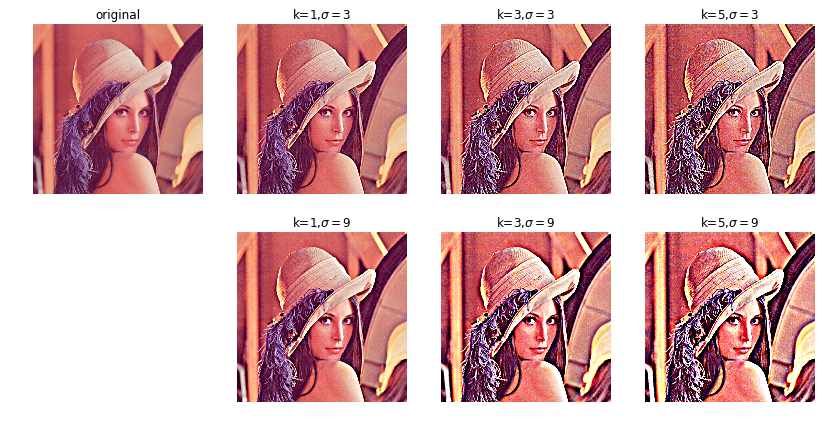

In [30]:
image = cv2.imread('./test_data/lenna.png')
plt.figure(figsize=(14,7))
plt.subplot(2,4,1)
plt.imshow(image[:,:,[2,1,0]])
plt.axis('off')
plt.title('original')

for sidx,sigma in enumerate([3,9]):
    delta_img=image.astype(np.int) - cv2.GaussianBlur(image,(0,0),sigma).astype(np.int)

    for idx,k in enumerate([1,3,5]):
        result = image.astype(np.int) + k*delta_img
        result = np.where(result < 0,0,result) #result[result<0] = 0
        result = np.where(result > 255,255,result) #result[result>255]=255
        enhanced = result.astype(np.uint8) #enhanced = cv2.convertScaleAbs(result)
        plt.subplot(2,4,idx+2+sidx*4)
        plt.axis('off')
        plt.imshow(enhanced[:,:,[2,1,0]])
        plt.title('k={},$\sigma={}$'.format(k,sigma))

plt.show()

### Image Interpolation
Flag       | Description
-----------|-------------
cv2.INTER_NEAREST  | nearest neighbor interpolation
cv2.INTER_LINEAR   | bilinear interpolation
cv2.INTER_CUBIC    | bicubic interpolation
cv2.INTER_AREA     | resampling using pixel area relation. It may be a preferred method for image decimation, as it gives moire'-free results. But when the image is zoomed, it is similar to the INTER_NEAREST method.
cv2.INTER_LANCZOS4 | Lanczos interpolation over 8x8 neighborhood
cv2.INTER_LINEAR_EXACT |Bit exact bilinear interpolation

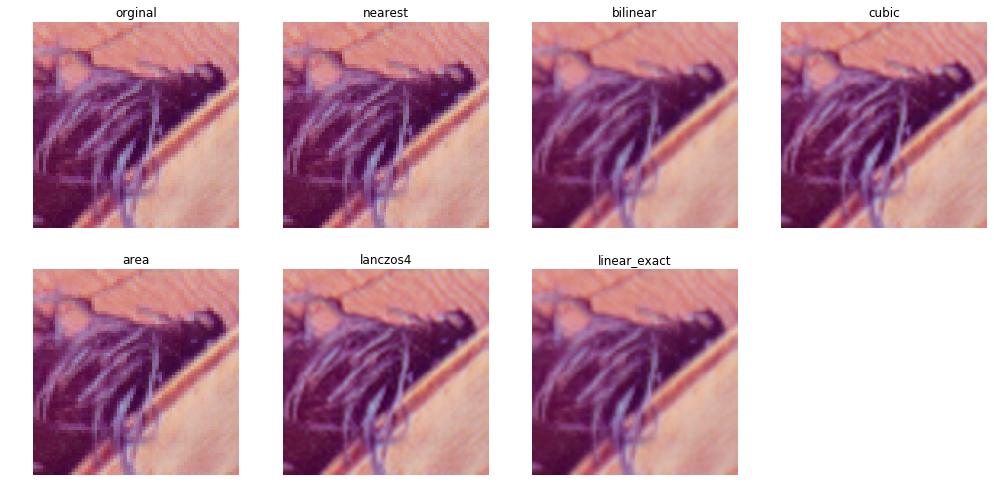

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 
image = cv2.imread('./test_data/lena-s.png')

plt.figure(figsize=(14,7)) 
plt.subplot(2,4,1)
plt.imshow(image[:,:,[2,1,0]])
plt.axis('off')
plt.title('orginal')
for idx,interp in enumerate([(cv2.INTER_NEAREST,'nearest'),(cv2.INTER_LINEAR,'bilinear'),(cv2.INTER_CUBIC,'cubic'),(cv2.INTER_AREA,'area'),(cv2.INTER_LANCZOS4,'lanczos4'),(cv2.INTER_LINEAR_EXACT,'linear_exact')]):
    dst = cv2.resize(image,None,fx=3.3, fy=3.3, interpolation = interp[0])
    plt.subplot(2,4,idx+2)
    plt.imshow(dst[:,:,[2,1,0]])
    plt.axis('off')
    plt.title(interp[1])
    
plt.tight_layout()
plt.show()

### Image Inpainting

Text(0.5, 1.0, 'Inpainted')

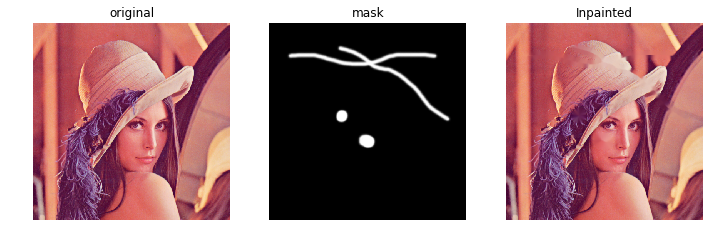

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import cv2  
image = cv2.imread('./test_data/lenna.png')
mask = cv2.imread('./test_data/mask.png',cv2.IMREAD_GRAYSCALE)
dst = cv2.inpaint(image,mask,3,cv2.INPAINT_TELEA)
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(image[:,:,[2,1,0]])
plt.axis('off')
plt.title('original')

plt.subplot(1,3,2)
plt.imshow(mask,cmap='gray')
plt.axis('off')
plt.title('mask')

plt.subplot(1,3,3)
plt.imshow(dst[:,:,[2,1,0]])
plt.axis('off')
plt.title('Inpainted')
